In [1]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import shlex


Threads: 1 naive
Threads: 1 faa


,method,increments
0,naive,3620766721
1,naive,3585417217
2,naive,3600489473
3,naive,3595590657
4,naive,3601771521
5,naive,3590012929
6,naive,3596403713
7,naive,3604799489
8,naive,3540107265
9,naive,3519742977


In [ ]:

NUM_ATTEMPTS = 20

time = 1000

data = []

METHODS = ['naive', 'faa']

thread_count = 1

# fig, axs = plt.subplots(counts//2, 2, sharex='all', sharey='all')


results = {'method': [], 'increments': []}
for method in METHODS:
    print(f'Threads: {thread_count} {method}')
    increments = []
    for _ in range(NUM_ATTEMPTS):
        command = shlex.split(f'./workload_timed.out {thread_count} {time} {method}')
        result = subprocess.run(command, capture_output=True, text=True, timeout=10)

        increment_count = None

        for line in result.stdout.splitlines():
            if line.startswith('final counter'):
                increment_count = int(line.split()[4])
        # increments.append(increment_count)
        results['method'].append(method)
        results['increments'].append(increment_count)
        #print(increment_count)
data = pd.DataFrame.from_dict(results)
data

FAA   4.2831030919143e-09
Naive 2.777630821818201e-10
 15.419986912121882


increments                                                          \
            count          mean           std           min           25%   
method                                                                      
faa          20.0  2.318686e+08  2.838705e+06  2.268805e+08  2.284803e+08   
naive        20.0  3.605571e+09  3.676622e+07  3.550320e+09  3.570449e+09   

                                                  
                 50%           75%           max  
method                                            
faa     2.334756e+08  2.340654e+08  2.344079e+08  
naive   3.600190e+09  3.642480e+09  3.658580e+09

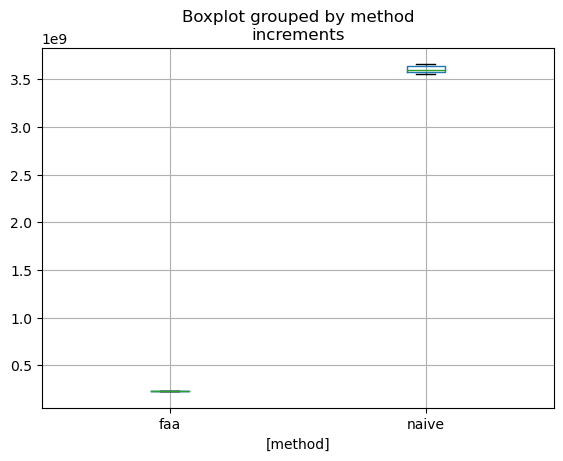

In [120]:
data.boxplot(by='method')


aggs  = data.groupby('method').describe()

faa_mean = aggs['increments', '50%']['faa']
naive_mean = aggs['increments', '50%']['naive']

faa_cost = 1 / faa_mean
naive_cost = 1 / naive_mean


print(f'FAA   {faa_cost}\nNaive {naive_cost}\n {faa_cost/naive_cost}')

aggs




In [2]:
NUM_ATTEMPTS = 20

time = 1000

data = []

METHODS = ['faa', 'shard_wf']

thread_count = 8

# fig, axs = plt.subplots(counts//2, 2, sharex='all', sharey='all')


results = {'method': [], 'increments': []}
for method in METHODS:
    print(f'Threads: {thread_count} {method}')
    increments = []
    for _ in range(NUM_ATTEMPTS):
        command = shlex.split(f'./workload_timed.out {thread_count} {time} {method}')
        result = subprocess.run(command, capture_output=True, text=True, timeout=10)

        increment_count = None

        for line in result.stdout.splitlines():
            if line.startswith('final counter'):
                increment_count = int(line.split()[4])
        # increments.append(increment_count)
        results['method'].append(method)
        results['increments'].append(increment_count)
        #print(increment_count)
data = pd.DataFrame.from_dict(results)
data

Threads: 8 faa
Threads: 8 shard_wf


,method,increments
0,faa,146257928
1,faa,146523144
2,faa,147900424
3,faa,150281224
4,faa,149545992
5,faa,150969352
6,faa,149391368
7,faa,146628616
8,faa,148571144
9,faa,149446664


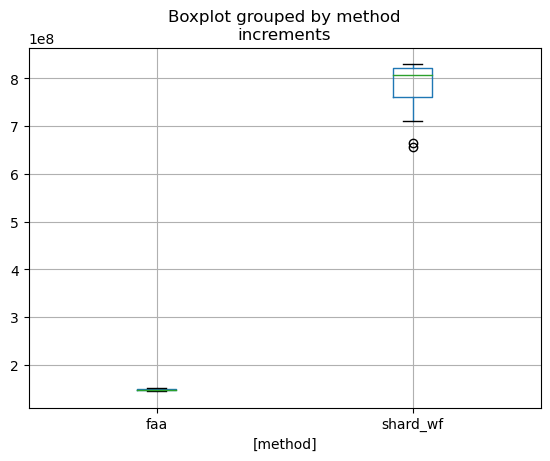

5.4347796682529195


increments                                                       \
              count         mean           std          min          25%   
method                                                                     
faa            20.0  147999240.0  1.693048e+06  144835592.0  146628360.0   
shard_wf       20.0  782890606.4  5.473717e+07  656034824.0  760864776.0   

                                                 
                  50%          75%          max  
method                                           
faa       148336136.0  149336840.0  150969352.0  
shard_wf  806174216.0  822715656.0  830268424.0

In [8]:
data.boxplot(by='method')
plt.show()


aggs  = data.groupby('method').describe()

faa_mean = aggs['increments', '50%']['faa']
wf_mean = aggs['increments', '50%']['shard_wf']

faa_cost = 1 / faa_mean
wf_mean_cost = 1 / wf_mean

print(faa_cost / wf_mean_cost)

aggs

In [10]:
dictdata = {'method': [], 'threads': [], 'increments': []}
with open('../a2result.txt') as resulttxt:
    for line in resulttxt:
        method, threads, increments = line.split()
        threads = int(threads)
        increments = int(increments)
        dictdata['method'].append(method)
        dictdata['threads'].append(threads)
        dictdata['increments'].append(increments)

data2 = pd.DataFrame.from_dict(dictdata)

data2


,method,threads,increments
0,faa,1,148950017
1,faa,2,30686210
2,faa,4,37234692
3,faa,8,32863240
4,faa,16,33054736
...,...,...,...
70,approx1,1,37578753
71,approx1,2,28190722
72,approx1,4,26490884
73,approx1,8,43321352


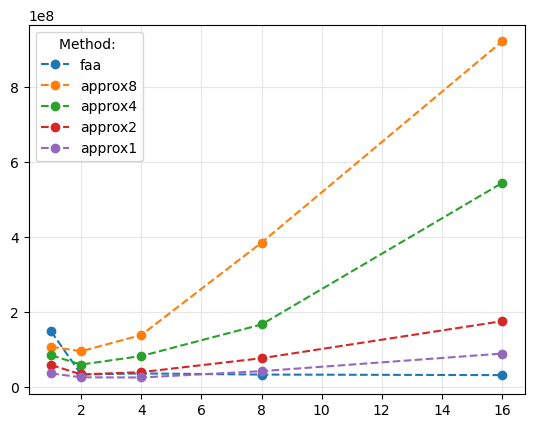

In [14]:
all_threads = data2['threads'].unique()
all_methods = data2['method'].unique()

for method in all_methods:
    method_data = data2[data2['method'] == method]
    method_data = method_data[['threads', 'increments']]

    agg = method_data.groupby(['threads'], sort=True).median('med')
    plt.plot(all_threads, agg['increments'], 'o--', label=method)

plt.grid(color='0.9')
plt.legend(title='Method: ')
plt.show()